In [1]:
#importing the relevant packages
import string
from pathlib import Path
from collections import Counter
from itertools import chain
import operator
import matplotlib.pyplot as plt

#using the american dictionary
DICT = "/usr/share/dict/american-english"

#setting up rules
ALLOWABLE_CHARACTERS = set(string.ascii_letters)
ALLOWED_ATTEMPTS = 6
WORD_LENGTH = 5

In [2]:
WORDS = {
  word.lower()
  for word in Path(DICT).read_text().splitlines()
  if len(word) == WORD_LENGTH and set(word) < ALLOWABLE_CHARACTERS
}

LETTER_COUNTER = Counter(chain.from_iterable(WORDS))

In [3]:
list(chain.from_iterable(["inspired", "python"]))

['i', 'n', 's', 'p', 'i', 'r', 'e', 'd', 'p', 'y', 't', 'h', 'o', 'n']

In [4]:
set("hello")

{'e', 'h', 'l', 'o'}

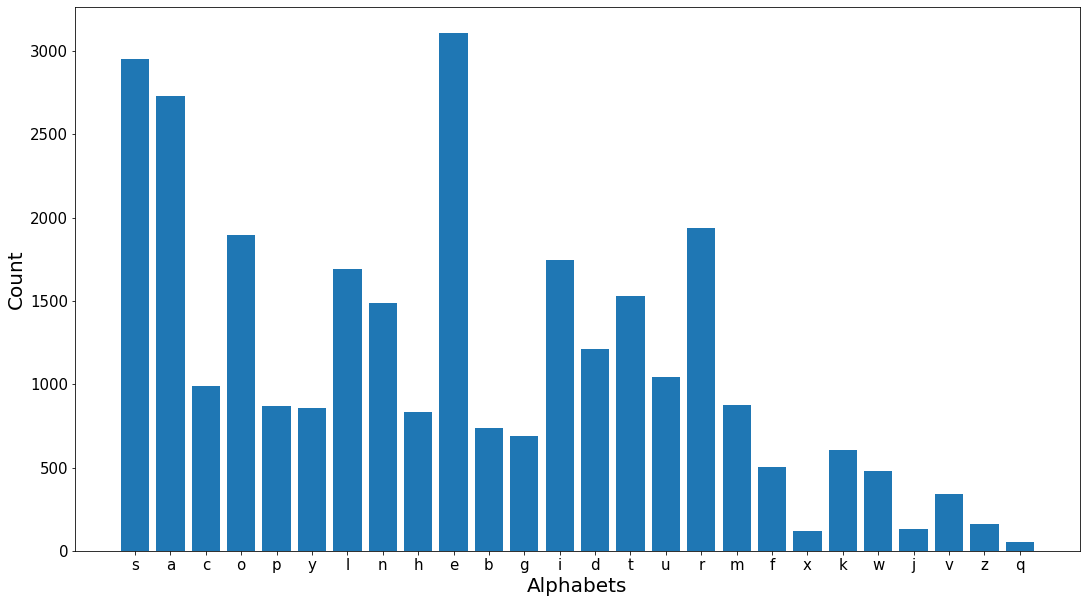

In [5]:
LETTER_COUNTER

plt.figure(figsize=(18,10))
plt.bar(LETTER_COUNTER.keys(), LETTER_COUNTER.values())
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Alphabets", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.show()

In [6]:
LETTER_FREQUENCY = {
    character: value / sum(LETTER_COUNTER.values())
    for character, value in LETTER_COUNTER.items()
}

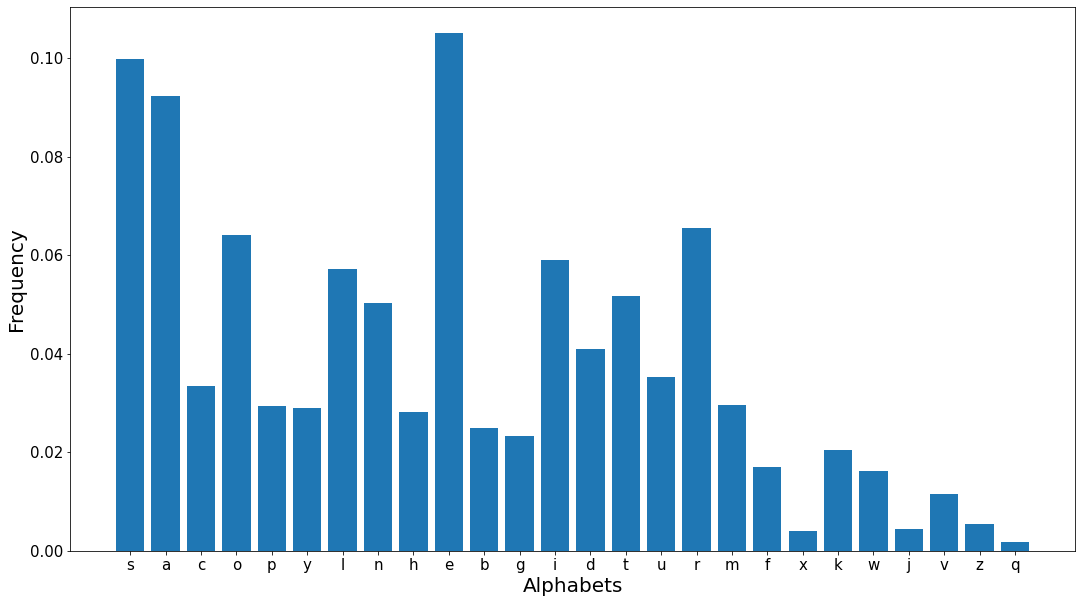

In [7]:
LETTER_FREQUENCY

plt.figure(figsize=(18,10))
plt.bar(LETTER_FREQUENCY.keys(), LETTER_FREQUENCY.values())
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Alphabets", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.show()

In [8]:
def calculate_word_commonality(word):
    score = 0.0
    for char in word:
        score += LETTER_FREQUENCY[char]
    return score / (WORD_LENGTH - len(set(word)) + 1)

In [9]:
calculate_word_commonality("fuzzy")

0.046043287115319576

In [10]:
calculate_word_commonality("cat")

0.0591590576034269

In [11]:
def sort_by_word_commonality(words):
    sort_by = operator.itemgetter(1)
    return sorted(
        [(word, calculate_word_commonality(word)) for word in words],
        key=sort_by,
        reverse=True,
    )

def display_word_table(word_commonalities):
    for (word, freq) in word_commonalities:
        print(f"{word:<10} | {freq:<5.2}")

In [12]:
def input_word():
    while True:
        word = input("Input the word you entered> ")
        if len(word) == WORD_LENGTH and word.lower() in WORDS:
            break
    return word.lower()


def input_response():
    print("Type the color-coded reply from Wordle:")
    print("  G for Green")
    print("  Y for Yellow")
    print("  ? for Gray")
    while True:
        response = input("Response from Wordle> ")
        if len(response) == WORD_LENGTH and set(response) <= {"G", "Y", "?"}:
            break
        else:
            print(f"Error - invalid answer {response}")
    return response

In [13]:
word_vector = [set(string.ascii_lowercase) for _ in range(WORD_LENGTH)]

In [14]:
def match_word_vector(word, word_vector):
    assert len(word) == len(word_vector)
    for letter, v_letter in zip(word, word_vector):
        if letter not in v_letter:
            return False
    return True

In [15]:
def match(word_vector, possible_words):
    return [word for word in possible_words if match_word_vector(word, word_vector)]

In [16]:
def solve():
    possible_words = WORDS.copy()
    word_vector = [set(string.ascii_lowercase) for _ in range(WORD_LENGTH)]
    for attempt in range(1, ALLOWED_ATTEMPTS + 1):
        print(f"Attempt {attempt} with {len(possible_words)} possible words")
        display_word_table(sort_by_word_commonality(possible_words)[:15])
        word = input_word()
        response = input_response()
        for idx, letter in enumerate(response):
            if letter == "G":
                word_vector[idx] = {word[idx]}
            elif letter == "Y":
                try:
                    word_vector[idx].remove(word[idx])
                except KeyError:
                    pass
            elif letter == "?":
                for vector in word_vector:
                    try:
                        vector.remove(word[idx])
                    except KeyError:
                        pass
        possible_words = match(word_vector, possible_words)

In [ ]:
solve()

Attempt 1 with 5914 possible words
arose      | 0.43 
aries      | 0.42 
aires      | 0.42 
arise      | 0.42 
raise      | 0.42 
earls      | 0.42 
laser      | 0.42 
reals      | 0.42 
aloes      | 0.42 
stare      | 0.41 
tears      | 0.41 
taser      | 0.41 
aster      | 0.41 
tares      | 0.41 
rates      | 0.41 
Input the word you entered> arose
Type the color-coded reply from Wordle:
  G for Green
  Y for Yellow
  ? for Gray
Response from Wordle> ??Y?G
Attempt 2 with 163 possible words
oldie      | 0.33 
louie      | 0.32 
tilde      | 0.31 
opine      | 0.31 
cline      | 0.31 
noble      | 0.3  
unite      | 0.3  
untie      | 0.3  
milne      | 0.3  
lithe      | 0.3  
monte      | 0.3  
olive      | 0.3  
voile      | 0.3  
doyle      | 0.3  
thine      | 0.29 
Input the word you entered> oldie
Type the color-coded reply from Wordle:
  G for Green
  Y for Yellow
  ? for Gray
Response from Wordle> Y??GG
Attempt 3 with 8 possible words
untie      | 0.3  
homie      | 0.29 
bog